## Importing libraries and input images

In [36]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [37]:
img1 = plt.imread('./input_img.jpeg')
img2 = plt.imread('./input_img2.jpeg')

In [38]:
print(img1.shape, img2.shape)

(1696, 2560, 3) (372, 383, 3)


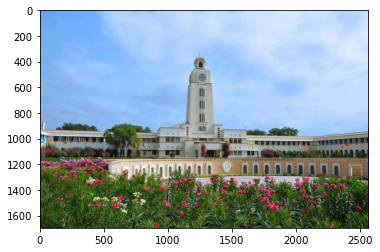

In [39]:
plt.imshow(img1)

## Flipping the image

In [40]:
img_flipped = np.copy(img1)
for j in range(img1.shape[1]):
    img_flipped[:,j,:] = img1[:,img1.shape[1]-1-j,:]

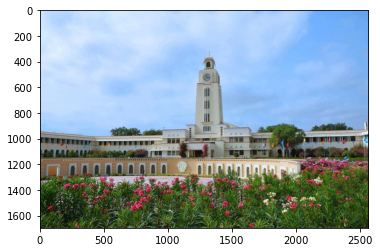

In [41]:
plt.imshow(img_flipped)

## Grayscaling the image
#### For Grayscaling an image, the red pixels must be multiplied by 0.3, blue pixels by 0.59 and green pixels by 0.11

In [42]:
img_gray = np.empty((img1.shape[0], img1.shape[1]))

In [43]:
img_gray[:,:] = img_flipped[:,:,0]*0.3 + img_flipped[:,:,1]*0.59 + img_flipped[:,:,2]*0.11

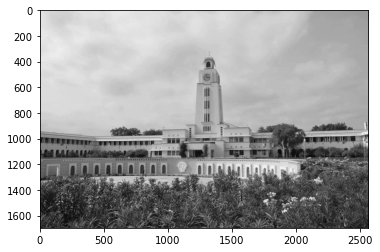

In [44]:
plt.imshow(img_gray, cmap = 'gray')

## Inverting the colours

In [45]:
img_gray[:][:] = abs(img_gray[:][:] - 255) 

# if old pixel value = 0 (black) then new pixel = 255 (white) and vice versa.

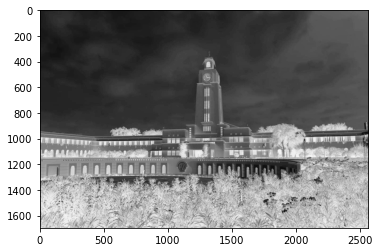

In [46]:
plt.imshow(img_gray, cmap = 'gray')

## Adding the padding

In [47]:
#The values below are the coordinates of the required rectangle from the top right corner of the image

lpad = 840 
rpad = 1800 #rpad = lpad + required width
tpad = 200
bpad = 1140 #bpad = tpad + required length

img_gray[:tpad,:] = 0
img_gray[bpad:,:] = 0
img_gray[:,0:lpad] = 0
img_gray[:,rpad:img1.shape[1]] = 0


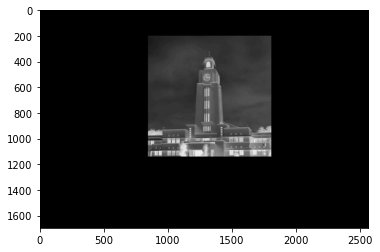

In [48]:
plt.imshow(img_gray, cmap = 'gray')

## Cropping the Image

In [49]:
border_width = 100
output = np.delete(img_gray, slice(lpad - border_width) , 1) #Cropping from left side 
output = np.delete(output, slice(tpad - border_width) , 0) #Cropping from top
output = np.delete(output, slice(rpad - lpad + border_width*2, img1.shape[1]) , 1) #Cropping from right side
output = np.delete(output, slice(bpad - tpad + border_width*2, img1.shape[0]) , 0) #Cropping from bottom

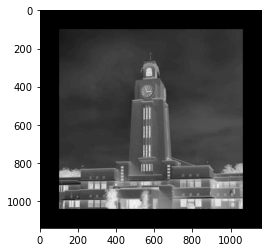

In [50]:
plt.imshow(output, cmap = 'gray')
plt.imsave('output.png', output, cmap = 'gray')

## Blending the two input images

In [51]:
output2 = np.copy(img1)
weight = 0.5
start_y = 400
start_x = 1050
for i in range(img2.shape[0]):
    for j in range(img2.shape[1]):
        output2[i+start_y][j+start_x][:] = img1[i+start_y][j+start_x][:]*weight + img2[i][j][:]*(1-weight) 
        
# Here pixel weights from both the images have been taken equal. The weights can be varied according to the needs.
# For weight = 1, only image1 is visible and for weight = 0, only image2 is visible

#The alignment of the second image with respect to the first image can be changed by changing the values of start_x and start_y

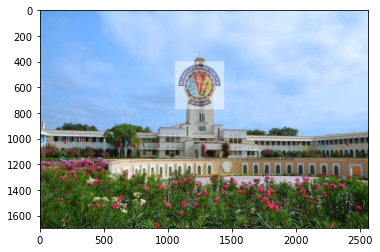

In [52]:
plt.imshow(output2)
plt.imsave('output2.png', output2) 

## END